In [ ]:
!pip install facebook_scraper
!pip install statsmodels==0.13.2
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 132 kB 43.7 MB/s 
     |████████████████████████████████| 288 kB 75.6 MB/s 
     |████████████████████████████████| 83 kB 3.9 MB/s 
     |████████████████████████████████| 749 kB 54.1 MB/s 
     |████████████████████████████████| 112 kB 83.3 MB/s 
     |████████████████████████████████| 70 kB 18.3 MB/s 
     |████████████████████████████████| 339 kB 58.8 MB/s 
  Created wheel for demjson3: filename=demjson3-3.0.5-py3-none-any.whl size=76064 sha256=f5f9cc83b7dcc557aba14c22c38fa79f2b1c11aec7ac22699bc84b1a7c6cb15a
  Stored in directory: /root/.cache/pip/wheels/c1/8b/a2/29e1cb2a9a3a27a5cfe8a57856a3310ea1e3c0a394eee8db61
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13486 sha256=fd97c59f1f8570d6ebe2e65cdc242e1b0ca22eb388b1d11fa4bfd16dedae0202
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Crea

In [ ]:
for post in get_posts('BlueApron', pages=5, cookies='meta_cookies.txt'):
    print(post['text'][:50])

/root/venv/lib/python3.7/site-packages/facebook_scraper/facebook_scraper.py:841: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


InvalidCookies: Cookies are not valid

In [ ]:
post_df_full = pd.DataFrame();

for post in get_posts('BlueApron', cookies='bacookies.txt', extra_info=True, pages=100):
    post_entry = post
    print(post)
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    # print(post['post_id'] + ' get')


    

oh=00_AT90lzWTdb4_6tI1bB7Mm5lok05KkJPx2sP4-kIpuTL5JA&oe=62742CF6', 'images': ['https://scontent-iad3-2.xx.fbcdn.net/v/t39.30808-6/246656156_4843322555710621_847920601778013986_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=101&ccb=1-5&_nc_sid=2d5d41&efg=eyJpIjoidCJ9&_nc_ohc=EBYEuap2NmcAX_ZGsbT&_nc_ht=scontent-iad3-2.xx&oh=00_AT_CYJaxMdCnDshiR80X5rVu6C6-8pGrkQLMxElBCegMCg&oe=62742CF6'], 'images_description': ['May be an image of dessert and indoor'], 'images_lowquality': ['https://scontent-iad3-2.xx.fbcdn.net/v/t39.30808-6/246656156_4843322555710621_847920601778013986_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=101&ccb=1-5&_nc_sid=2d5d41&efg=eyJpIjoidCJ9&_nc_ohc=EBYEuap2NmcAX_ZGsbT&_nc_ht=scontent-iad3-2.xx&oh=00_AT90lzWTdb4_6tI1bB7Mm5lok05KkJPx2sP4-kIpuTL5JA&oe=62742CF6'], 'images_lowquality_description': ['May be an image of dessert and indoor'], 'video': None, 'video_duration_seconds': None, 'video_height': None, 'video_id': None, 'video_quality': None, 'video_size_MB': None, 'video_thu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 0
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        396 non-null    object        
 1   text                           394 non-null    object        
 2   post_text                      394 non-null    object        
 3   shared_text                    394 non-null    object        
 4   original_text                  0 non-null      object        
 5   time                           397 non-null    datetime64[ns]
 6   timestamp                      396 non-null    object        
 7   image                          310 non-null    object        
 8   image_lowquality               397 non-null    object        
 9   images                         397 non-null    object        
 10  images_description             397 non-null    object        
 11  images_lowquality    

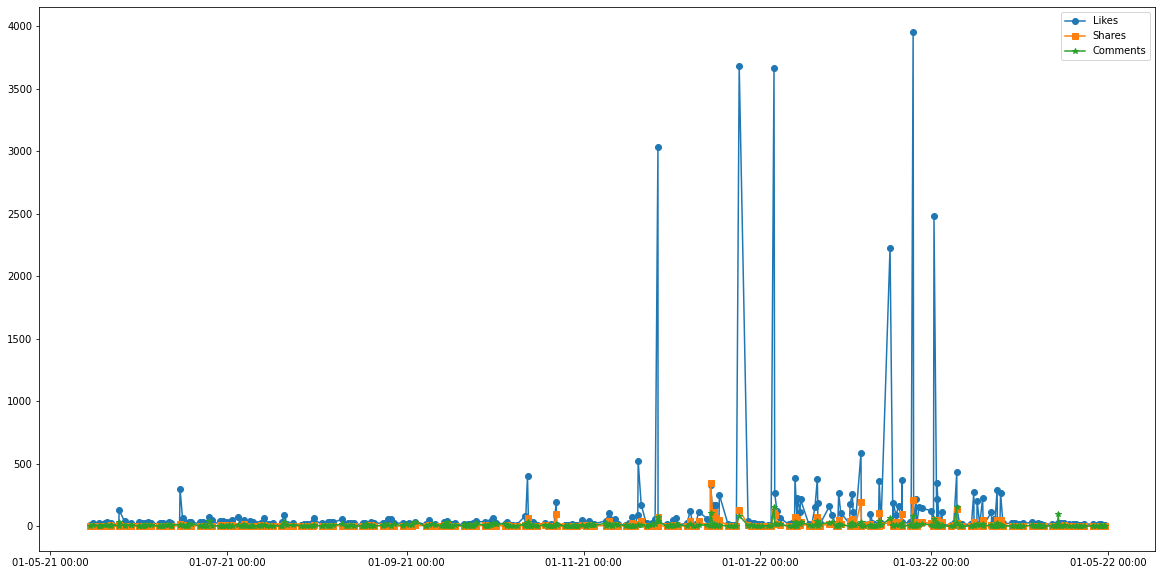

In [ ]:
post_df_full.info()
post_df_full.head()
post_df_full.to_csv('blue_apron.csv')

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], label = "Likes", marker="o")
ax.plot(post_df_full['time'], post_df_full['shares'], label = "Shares", marker="s")
ax.plot(post_df_full['time'], post_df_full['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit


badf = post_df_full.sort_values(by=['time'], ascending=True).loc[:, ["time", "likes", "comments", "shares"]]
badf = badf.reset_index(drop=True)
display(badf)
badf = badf.fillna(0)
badf["likes"] = badf["likes"].astype("int")
badf["comments"] = badf["comments"].astype("int")
badf["shares"] = badf["shares"].astype("int")
badf.info()
badf.describe()
print(badf.dtypes)



,time,likes,comments,shares
0,2021-05-14 19:00:39,9,0,1
1,2021-05-15 18:14:03,27,5,0
2,2021-05-17 16:09:05,8,4,0
3,2021-05-17 18:42:02,22,2,0
4,2021-05-17 19:56:02,11,0,1
...,...,...,...,...
392,2022-04-28 01:42:00,7,0,0
393,2022-04-28 15:11:52,13,1,2
394,2022-04-28 16:44:04,11,0,1
395,2022-04-29 16:30:15,4,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      397 non-null    datetime64[ns]
 1   likes     397 non-null    int64         
 2   comments  397 non-null    int64         
 3   shares    397 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 12.5 KB
time        datetime64[ns]
likes                int64
comments             int64
shares               int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      397 non-null    datetime64[ns]
 1   likes     397 non-null    int64         
 2   comments  397 non-null    int64         
 3   shares    397 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 12.5 KB


,likes,comments,shares
count,397.000000,397.000000,397.000000
mean,94.501259,7.972292,9.899244
std,398.025916,16.318074,29.239345
min,2.000000,0.000000,0.000000
25%,12.000000,1.000000,1.000000
50%,20.000000,3.000000,2.000000
75%,36.000000,8.000000,4.000000
max,3954.000000,155.000000,346.000000


,time,likes,comments,shares
0,2021-05-14 19:00:39,9,0,1
1,2021-05-15 18:14:03,27,5,0
2,2021-05-17 16:09:05,8,4,0
3,2021-05-17 18:42:02,22,2,0
4,2021-05-17 19:56:02,11,0,1
5,2021-05-18 16:36:16,20,2,1
6,2021-05-19 18:45:05,22,6,2
7,2021-05-20 16:49:03,35,6,2
8,2021-05-21 16:00:47,18,1,6
9,2021-05-21 20:34:01,21,5,0


time        datetime64[ns]
likes                int64
comments             int64
shares               int64
dtype: object


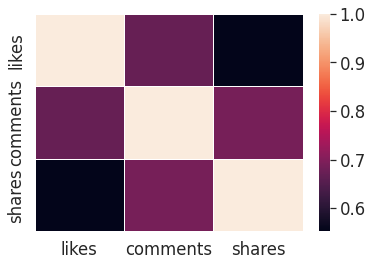

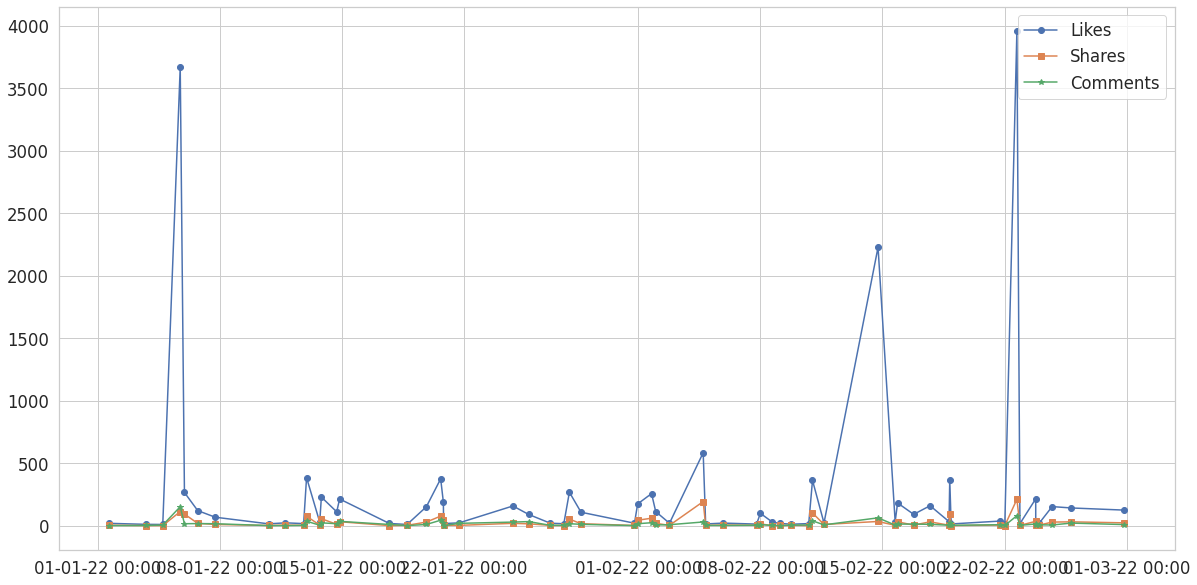

In [ ]:


badf.info()
display(badf.describe())
display(badf.head(20))
print(badf.dtypes)
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

sns.heatmap(badf.corr(), linewidths = .7, xticklabels = 1, yticklabels = 1)


gr = badf[(badf['time'] > '2022-01-01') & (badf['time'] < '2022-03-01')]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(gr['time'], gr['likes'], label = "Likes", marker="o")
ax.plot(gr['time'], gr['shares'], label = "Shares", marker="s")
ax.plot(gr['time'], gr['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

     |████████████████████████████████| 9.8 MB 28.5 MB/s 
     |████████████████████████████████| 233 kB 78.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import statsmodels
import numpy as np



data = badf.copy()
data['time'] = pd.to_datetime(data.time , format = '%d/%m/%Y %H.%M.%S')
data = data.set_index("time")
display(data.head(10))

print(data.describe())
print(data.info())
print(data.dtypes)

for s in ["likes", "comments", "shares"]:
    q_low = data[s].quantile(0.025)
    q_hi  = data[s].quantile(0.975)
    data = data[(data[s] < q_hi) & (data[s] > q_low)]

print("post change describe")
print(data.describe())


data["social_media_score"] = (0.8*data["likes"] + data["comments"] + 0.3*data["shares"])/352


,likes,comments,shares
time,,,
2021-05-14 19:00:39,9,0,1
2021-05-15 18:14:03,27,5,0
2021-05-17 16:09:05,8,4,0
2021-05-17 18:42:02,22,2,0
2021-05-17 19:56:02,11,0,1
2021-05-18 16:36:16,20,2,1
2021-05-19 18:45:05,22,6,2
2021-05-20 16:49:03,35,6,2
2021-05-21 16:00:47,18,1,6


             likes    comments      shares
count   397.000000  397.000000  397.000000
mean     94.501259    7.972292    9.899244
std     398.025916   16.318074   29.239345
min       2.000000    0.000000    0.000000
25%      12.000000    1.000000    1.000000
50%      20.000000    3.000000    2.000000
75%      36.000000    8.000000    4.000000
max    3954.000000  155.000000  346.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 2021-05-14 19:00:39 to 2022-04-29 19:21:02
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   likes     397 non-null    int64
 1   comments  397 non-null    int64
 2   shares    397 non-null    int64
dtypes: int64(3)
memory usage: 12.4 KB
None
likes       int64
comments    int64
shares      int64
dtype: object
post change describe
            likes    comments      shares
count  210.000000  210.000000  210.000000
mean    46.523810    6.880952    6.652381
std     54.503078    6.27443

,likes,comments,shares,social_media_score,MA
time,,,,,
2021-05-18 16:36:16,20,2,1,0.051989,NaN
2021-05-19 18:45:05,22,6,2,0.068750,NaN
2021-05-20 16:49:03,35,6,2,0.098295,NaN
2021-05-21 16:00:47,18,1,6,0.048864,NaN
2021-05-28 20:29:02,18,6,2,0.059659,NaN
...,...,...,...,...,...
2022-04-14 17:03:04,12,1,2,0.031818,0.202102
2022-04-15 16:33:04,23,10,5,0.084943,0.188750
2022-04-20 18:58:01,12,2,2,0.034659,0.188685


,social_media_score,MA
time,,
2021-07-02 20:25:02,0.123580,0.096550
2021-07-04 14:55:20,0.180966,0.100235
2021-07-05 19:00:24,0.044318,0.099537
2021-07-06 16:00:47,0.121591,0.100203
2021-07-06 18:03:51,0.147159,0.103011
2021-07-07 16:00:44,0.061648,0.103068
2021-07-07 22:38:03,0.060511,0.103279
2021-07-08 21:52:01,0.098295,0.104903
2021-07-09 17:39:19,0.065057,0.104935


/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/root/venv/lib/python3.7/site-packa

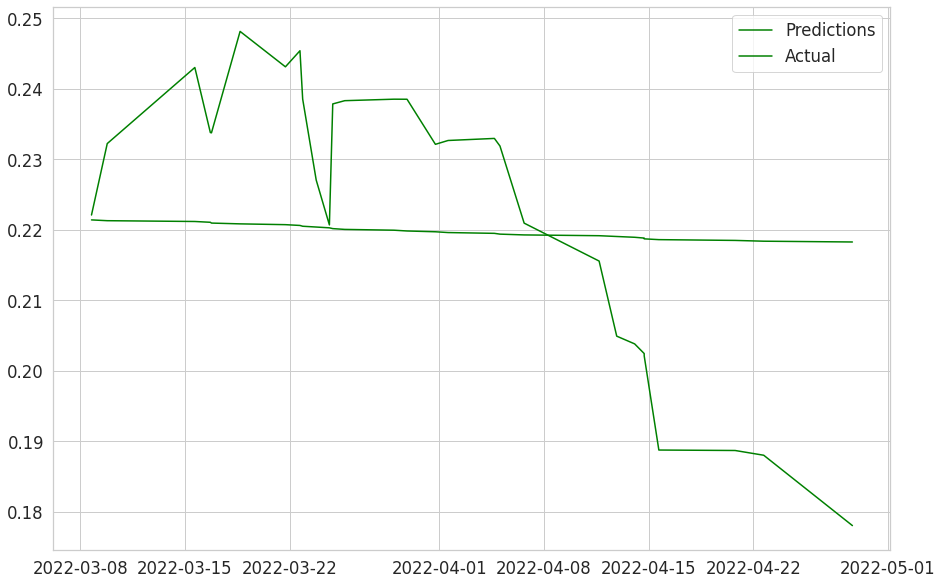

In [ ]:
data['MA'] = data["social_media_score"].rolling(window = 35).mean()
display(data)

# fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(data.index, data['MA'], label = "social_media_score", marker="o")
# plt.legend()
# display(data)


tsdf = data.dropna()
display(tsdf[["social_media_score", "MA"]].head(10))
train = tsdf[:int(0.7*(len(data)))]["MA"]
test = tsdf[int(0.7*(len(data))):int(0.9*(len(data)))]["MA"]

from statsmodels.tsa.statespace.sarimax import SARIMAX
ARMAmodel = SARIMAX(train, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(y_pred_out, color='green', label = 'Predictions')
ax.plot(test, color='green', label = 'Actual')
plt.legend()




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>